In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
events_data = pd.read_csv('event_data_train.csv')

In [3]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [4]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [5]:
events_data['date'] = pd.to_datetime(events_data['timestamp'], unit='s')

In [6]:
events_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [7]:
events_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [8]:
events_data.date.min()

Timestamp('2015-06-15 04:00:48')

In [9]:
events_data['day'] = events_data.date.dt.date

In [10]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [11]:
events_data.groupby('day').user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

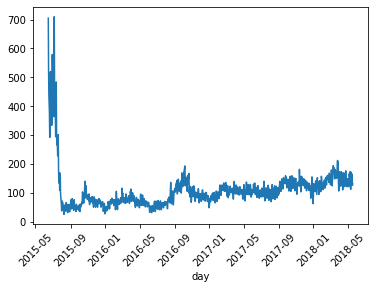

In [12]:
events_data.groupby('day').user_id.nunique().plot()
plt.xticks(rotation=45)
plt.show()

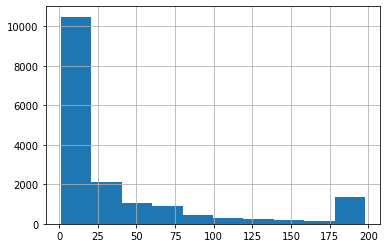

In [13]:
events_data[events_data['action'] == 'passed'].groupby('user_id', as_index=False)\
.agg('step_id').count().rename(columns={'step_id':'passed_steps'}).passed_steps.hist()

In [14]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count',\
                       fill_value=0).head()

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1


In [15]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count',\
                       fill_value=0).reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


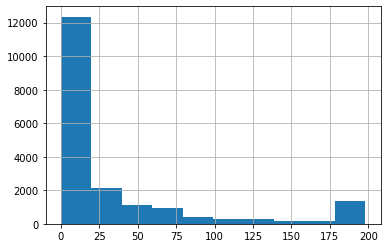

In [16]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count',\
                       fill_value=0).reset_index().passed.hist()

In [17]:
submissions_data = pd.read_csv('submissions_data_train.csv')
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [18]:
submissions_data['date'] = pd.to_datetime(submissions_data['timestamp'], unit='s')
submissions_data['day']=submissions_data['date'].dt.date
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [19]:
user_scores = submissions_data.pivot_table(index='user_id', columns='submission_status', values='step_id',\
                            aggfunc='count', fill_value=0).reset_index()

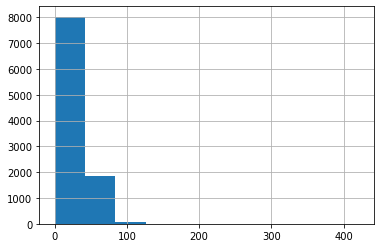

In [20]:
user_scores.correct.hist()

In [21]:
events_data[['user_id','step_id']].head(10)

,user_id,step_id
0,17632,32815
1,17632,32815
2,17632,32815
3,17632,32811
4,17632,32811
5,17632,32811
6,17632,32929
7,17632,32929
8,17632,32929
9,17632,32929


In [22]:
events_data[['step_id','user_id']].drop_duplicates().head()

,step_id,user_id
0,32815,17632
3,32811,17632
6,32929,17632
10,32814,17632
13,32812,17632


In [23]:
events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day']).\
groupby('user_id')['timestamp'].apply(list).head()

user_id
1                                         [1472827464]
2                             [1514383364, 1519226966]
3    [1434358476, 1441257725, 1441440209, 144153391...
5                             [1466156809, 1499859621]
7                                         [1521634660]
Name: timestamp, dtype: object

In [24]:
events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day']).\
groupby('user_id')['timestamp'].apply(list).apply(np.diff).head()

user_id
1                                                  []
2                                           [4843602]
3    [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                          [33702812]
7                                                  []
Name: timestamp, dtype: object

In [25]:
events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day']).\
groupby('user_id')['timestamp'].apply(list).apply(np.diff).values

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
          98252,    57019]),
       array([1567990]), array([], dtype=int32)], dtype=object)

In [26]:
gap_data = events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day']).\
groupby('user_id')['timestamp'].apply(list).apply(np.diff).values

In [27]:
np.concatenate(gap_data, axis=0)

array([4843602, 6899249,  182484, ...,   98252,   57019, 1567990])

In [28]:
gap_data1 = pd.Series(np.concatenate(gap_data, axis=0))

In [29]:
gap_data2 = gap_data1/(24*60*60)

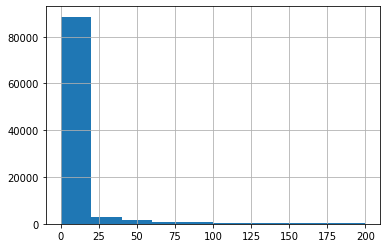

In [30]:
gap_data2[gap_data2<200].hist()

In [31]:
gap_data2.quantile(0.95)

59.760440972222156

In [32]:
#Задание
#submissions_data.pivot_table(index='user_id', columns='submission_status', values='step_id',\
                            #aggfunc='count', fill_value=0).correct.sort_values(ascending=True)

In [33]:
gap_data1.quantile(0.90)/(24*60*60)

18.325995370370403

In [34]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [35]:
events_data.groupby('user_id', as_index=False)\
.agg({'timestamp':'max'}).rename(columns={'timestamp':'last_timestamp'}).head()

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660


In [36]:
users_data = events_data.groupby('user_id', as_index=False)\
.agg({'timestamp':'max'}).rename(columns={'timestamp':'last_timestamp'}).head()

In [37]:
users_data['is_gone_user'] = 1526772811-users_data['last_timestamp']

In [38]:
users_data

,user_id,last_timestamp,is_gone_user
0,1,1472827464,53945347
1,2,1519226966,7545845
2,3,1444581588,82191223
3,5,1499859939,26912872
4,7,1521634660,5138151


In [39]:
now = 1526772811
drop_out_treshold = 30 * 24 * 60 * 60
drop_out_treshold

2592000

In [40]:
now = 1526772811
drop_out_treshold = 2592000

In [41]:
users_data['is_gone_user'] = (now-users_data['last_timestamp']) > drop_out_treshold

In [42]:
users_data.head(10)

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [43]:
users_data=users_data.merge(user_scores, how='outer')

In [44]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1.472827e+09,True,NaN,NaN
1,2,1.519227e+09,True,2.0,0.0
2,3,1.444582e+09,True,29.0,23.0
3,5,1.499860e+09,True,2.0,2.0
4,7,1.521635e+09,True,NaN,NaN


In [45]:
users_data = users_data.fillna(0)

In [46]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1.472827e+09,True,0.0,0.0
1,2,1.519227e+09,True,2.0,0.0
2,3,1.444582e+09,True,29.0,23.0
3,5,1.499860e+09,True,2.0,2.0
4,7,1.521635e+09,True,0.0,0.0


In [47]:
users_events_data=events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count',\
                       fill_value=0).reset_index()

In [48]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [49]:
users_data =  users_data.merge(users_events_data, how='outer').head()

In [50]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1.472827e+09,True,0.0,0.0,1,0,0,1
1,2,1.519227e+09,True,2.0,0.0,9,9,2,10
2,3,1.444582e+09,True,29.0,23.0,91,87,30,192
3,5,1.499860e+09,True,2.0,2.0,11,11,4,12
4,7,1.521635e+09,True,0.0,0.0,1,1,0,1


In [51]:
users_day = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [52]:
users_day.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [54]:
users_data = users_data.merge(users_day, how='outer')

In [55]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1.472827e+09,True,0.0,0.0,1.0,0.0,0.0,1.0,1
1,2,1.519227e+09,True,2.0,0.0,9.0,9.0,2.0,10.0,2
2,3,1.444582e+09,True,29.0,23.0,91.0,87.0,30.0,192.0,7
3,5,1.499860e+09,True,2.0,2.0,11.0,11.0,4.0,12.0,2
4,7,1.521635e+09,True,0.0,0.0,1.0,1.0,0.0,1.0,1


In [56]:
users_data.user_id.nunique()

19234

In [57]:
events_data.user_id.nunique()

19234

In [59]:
users_data['passed_corse'] = users_data['passed'] > 170

In [60]:
users_data['passed_corse'].value_counts()

False    19234
Name: passed_corse, dtype: int64

In [61]:
users_data.groupby('passed_corse').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_corse,,,,,,,,,,
False,19234,5,5,5,5,5,5,5,5,19234


In [62]:
users_data['passed_corse'] = users_data['passed'] > 170

In [63]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1.472827e+09,True,0.0,0.0,1.0,0.0,0.0,1.0,1,False
1,2,1.519227e+09,True,2.0,0.0,9.0,9.0,2.0,10.0,2,False
2,3,1.444582e+09,True,29.0,23.0,91.0,87.0,30.0,192.0,7,False
3,5,1.499860e+09,True,2.0,2.0,11.0,11.0,4.0,12.0,2,False
4,7,1.521635e+09,True,0.0,0.0,1.0,1.0,0.0,1.0,1,False


In [69]:
users_data[users_data.passed_corse].day.median()

nan

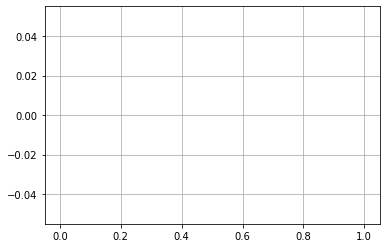

In [70]:
users_data[users_data.passed_corse].day.hist()

In [68]:
users_data.passed_corse.value_counts()

False    19234
Name: passed_corse, dtype: int64